In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('processed/df.csv')
df_encoded = pd.read_csv('processed/df_encoded.csv')
df_numeric = pd.read_csv('processed/df_numeric.csv')
numerical_columns = [line.strip() for line in open('processed/numerical_columns.txt', 'r')]
categorical_columns = [line.strip() for line in open('processed/categorical_columns.txt', 'r')]

# 2 Exploratory Data Analysis

In this notebook, we will summarize and visualize the data in order to better understand the properties of the data. The main goal is to already see correlations between variables and potentially already identify correlations between the missingness of certain columns, such that in a later step the appropriate imputation method can be chosen.

## Data from preprocessing

### df
The df dataset contains more or less the original dataset, except the columns which contained "Yes" / "No" were replaced by booleans, as well as the class variable.

### df_encoded
We created a dataset with the encoded categorical variables in the previous notebook. This dataset contains all categorical values as one_hot encodings. 

### df_numeric
We created a dataset where all variables are represented numerically. The categorical values could be turned into booleans (which were encoded as 0 and 1), while other categorical variables were already encoded by numbers.


In [43]:
df.describe()

age  blood_pressure  blood_glucose_random  blood_urea  \
count  391.000000      388.000000            356.000000  381.000000   
mean    51.483376       76.469072            148.036517   57.425722   
std     17.169714       13.683637             79.281714   50.503006   
min      2.000000       50.000000             22.000000    1.500000   
25%     42.000000       70.000000             99.000000   27.000000   
50%     55.000000       80.000000            121.000000   42.000000   
75%     64.500000       80.000000            163.000000   66.000000   
max     90.000000      180.000000            490.000000  391.000000   

       serum_creatinine      sodium   potassium  hemoglobin  \
count        383.000000  313.000000  312.000000  348.000000   
mean           3.072454  137.528754    4.627244   12.526437   
std            5.741126   10.408752    3.193904    2.912587   
min            0.400000    4.500000    2.500000    3.100000   
25%            0.900000  135.000000    3.800000   10.300000   
50%            1.300000  138.000000    4.400000   12.650000   
75%            2.800000  142.000000    4.900000   15.000000   
max           76.000000  163.000000   47.000000   17.800000   

       packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
count          329.000000              294.000000            269.000000   
mean            38.884498             8406.122449              4.707435   
std              8.990105             2944.474190              1.025323   
min              9.000000             2200.000000              2.100000   
25%             32.000000             6500.000000              3.900000   
50%             40.000000             8000.000000              4.800000   
75%             45.000000             9800.000000              5.400000   
max             54.000000            26400.000000              8.000000   

       hypertension  diabetes_mellitus  coronary_artery_disease  pedal_edema  \
count    398.000000         398.000000               398.000000   399.000000   
mean       0.369347           0.344221                 0.085427     0.190476   
std        0.483235           0.475712                 0.279868     0.393170   
min        0.000000           0.000000                 0.000000     0.000000   
25%        0.000000           0.000000                 0.000000     0.000000   
50%        0.000000           0.000000                 0.000000     0.000000   
75%        1.000000           1.000000                 0.000000     0.000000   
max        1.000000           1.000000                 1.000000     1.000000   

           anemia       class  
count  399.000000  400.000000  
mean     0.150376    0.625000  
std      0.357888    0.484729  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      0.000000    1.000000  
max      1.000000    1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    object 
 3   albumin                  354 non-null    object 
 4   sugar                    351 non-null    object 
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [44]:
df.head()

age  blood_pressure specific_gravity albumin sugar red_blood_cells  \
0  48.0            80.0           _1.020      _1    _0             NaN   
1   7.0            50.0           _1.020      _4    _0             NaN   
2  62.0            80.0           _1.010      _2    _3          normal   
3  48.0            70.0           _1.005      _4    _0          normal   
4  51.0            80.0           _1.010      _2    _0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   NaN   
2                31.0                  7500.0                   NaN   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           1.0                1.0                      0.0      good   
1           0.0                0.0                      0.0      good   
2           0.0                1.0                      0.0      poor   
3           1.0                0.0                      0.0      poor   
4           0.0                0.0                      0.0      good   

   pedal_edema  anemia  class  
0          0.0     0.0      1  
1          0.0     0.0      1  
2          0.0     1.0      1  
3          1.0     1.0      1  
4          0.0     0.0      1  

[5 rows x 25 columns]

In [45]:
def print_range_of_values(dataframe):
    for col in dataframe.columns:
        print(col, '\t',dataframe[col].unique())
        
print_range_of_values(df[categorical_columns])

specific_gravity 	 ['_1.020' '_1.010' '_1.005' '_1.015' nan '_1.025']
albumin 	 ['_1' '_4' '_2' '_3' '_0' nan '_5']
sugar 	 ['_0' '_3' '_4' '_1' nan '_2' '_5']
red_blood_cells 	 [nan 'normal' 'abnormal']
pus_cell 	 ['normal' 'abnormal' nan]
pus_cell_clumps 	 ['notpresent' 'present' nan]
bacteria 	 ['notpresent' 'present' nan]
hypertension 	 [ 1.  0. nan]
diabetes_mellitus 	 [ 1.  0. nan]
coronary_artery_disease 	 [ 0.  1. nan]
appetite 	 ['good' 'poor' nan]
pedal_edema 	 [ 0.  1. nan]
anemia 	 [ 0.  1. nan]
class 	 [1 0]


In [49]:
import seaborn as sb

## Rough overview of the correlations

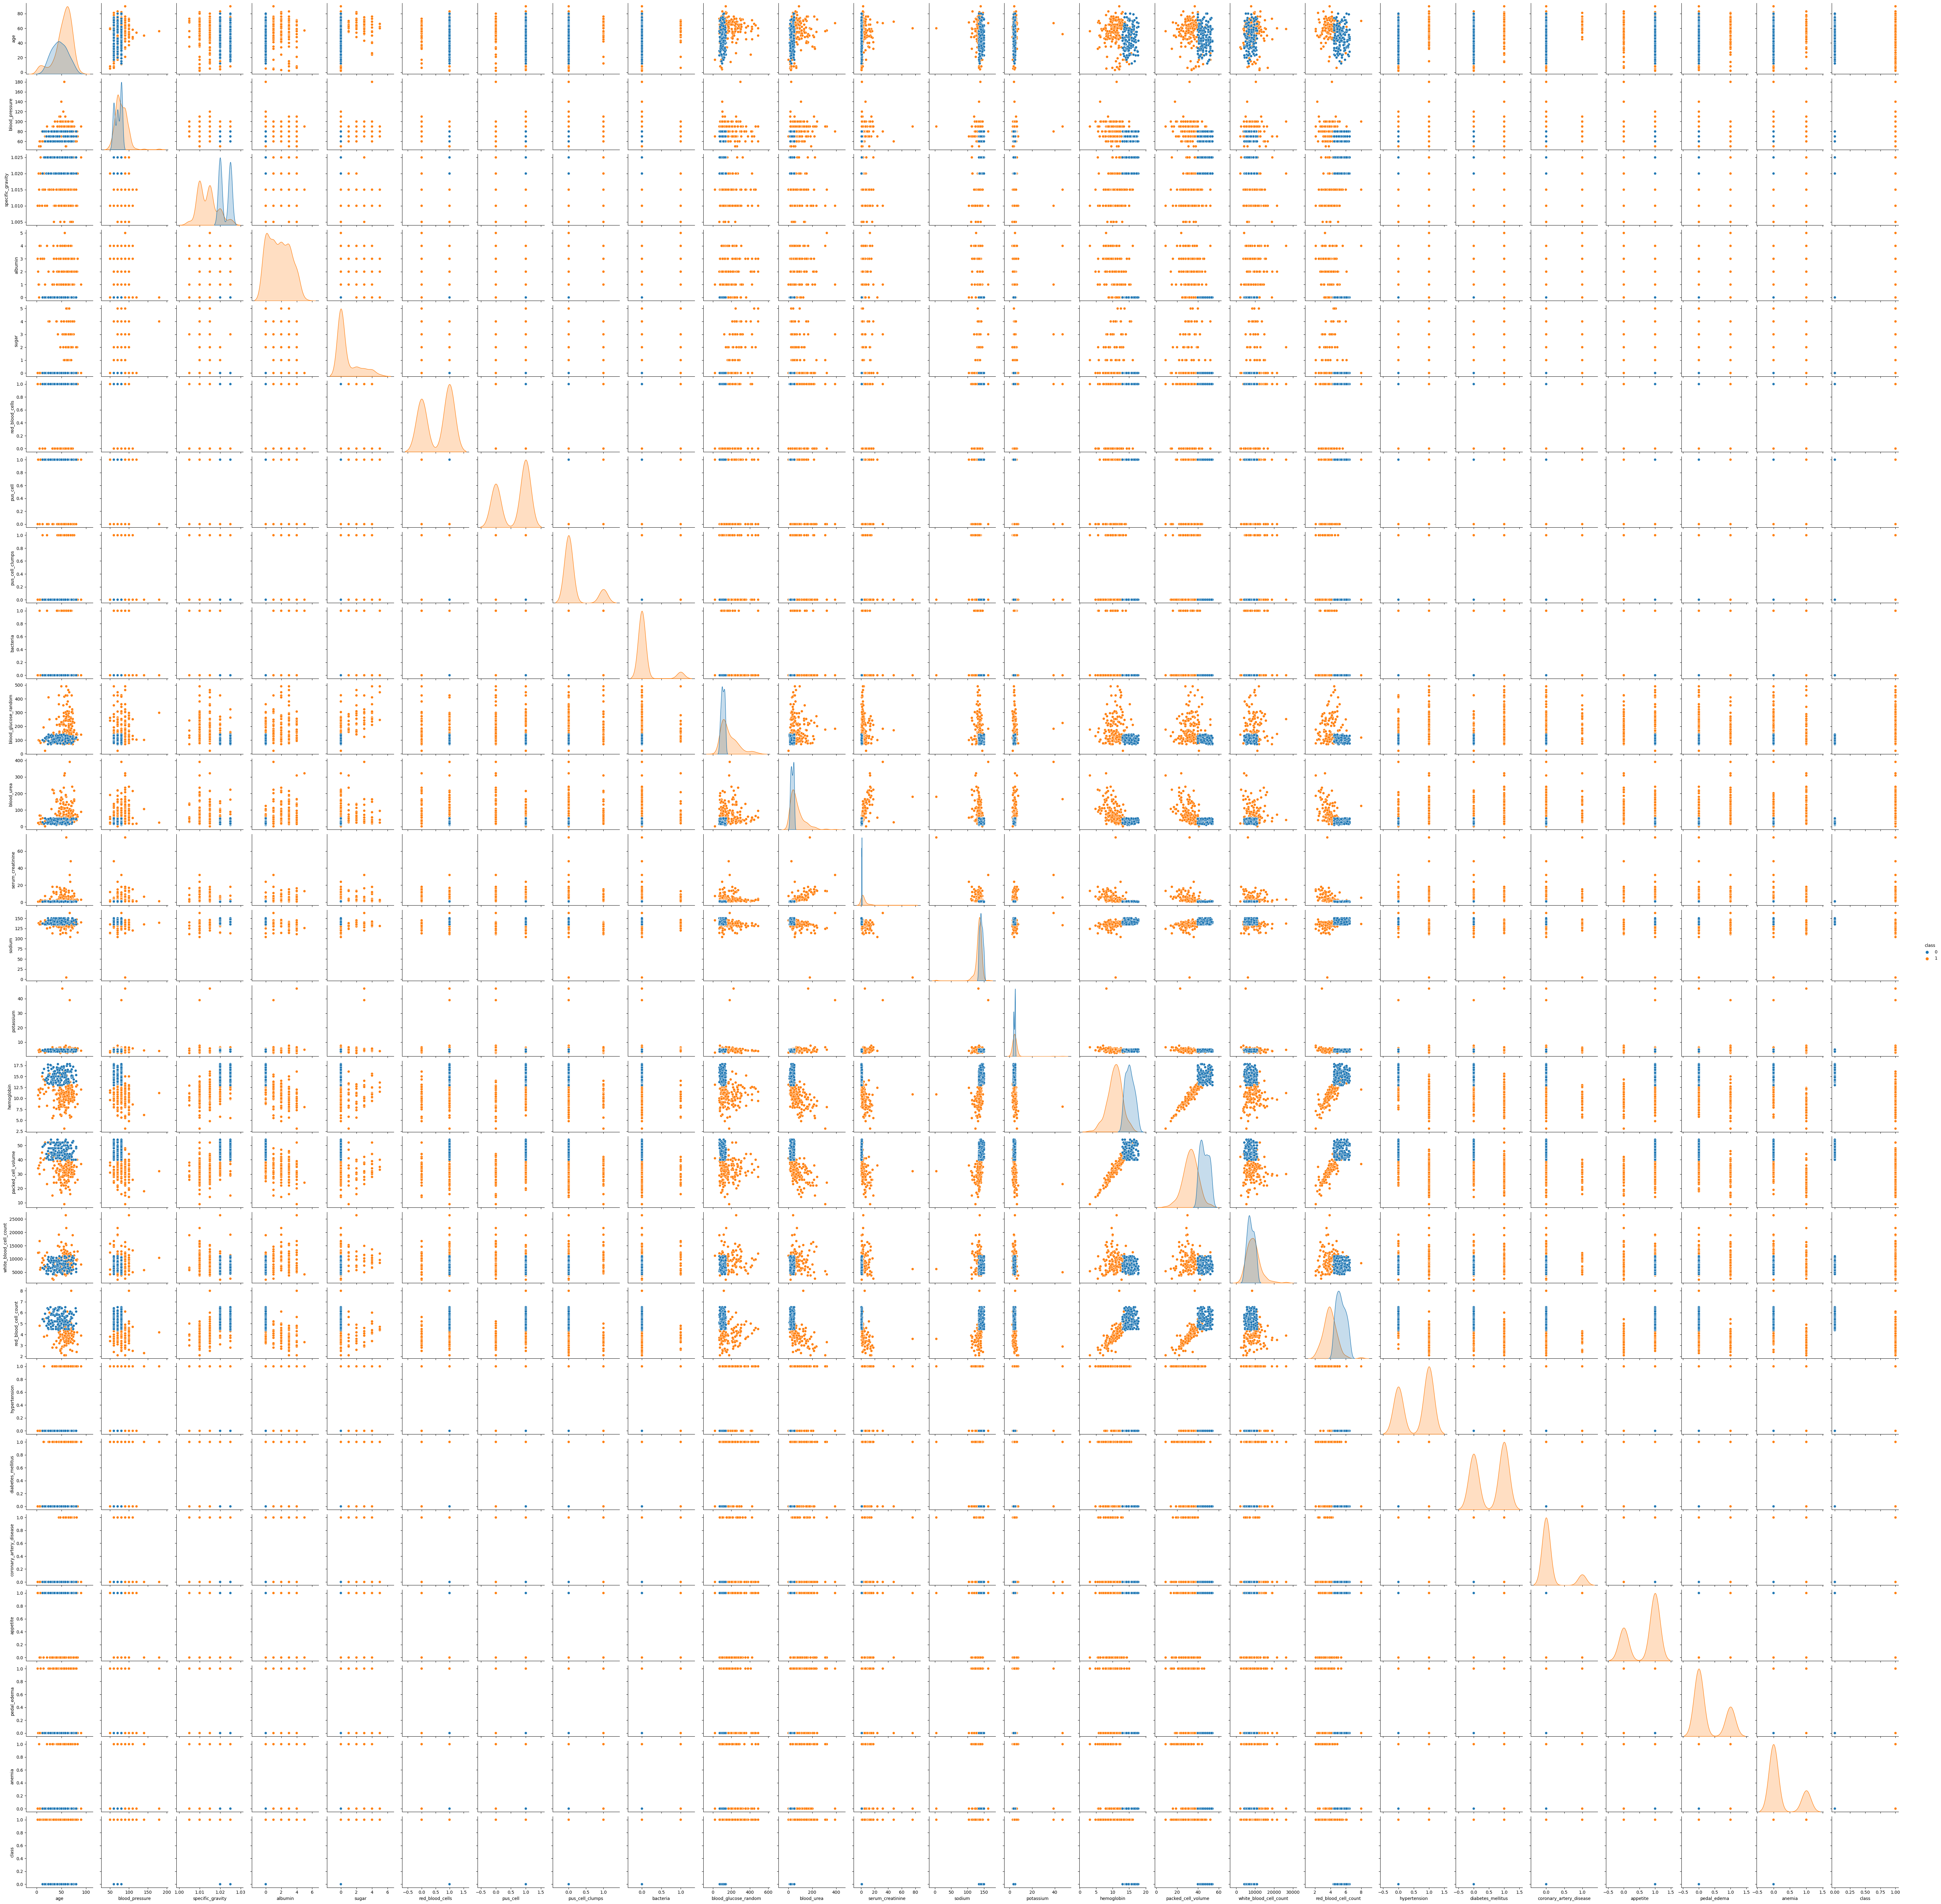

In [97]:
sb.pairplot(df_numeric, hue="class", vars=[x for x in df_numeric.select_dtypes(include='number').columns])
plt.show()

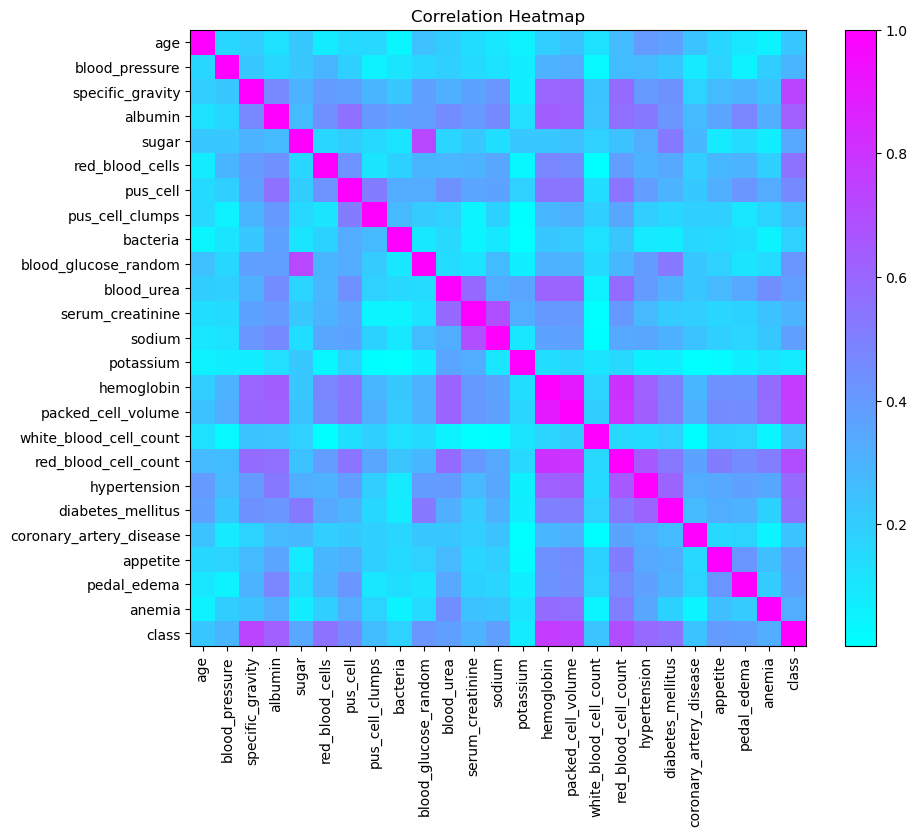

In [190]:
# Calculate the correlation matrix
corr_matrix = df_numeric.corr().abs()

# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
plt.imshow(corr_matrix, cmap='cool', interpolation='nearest')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.show()


In [192]:
# Sort the correlation matrix
sorted_corr_matrix = corr_matrix.sort_values(by='class', ascending=False)

## More detailed analysis
### Suspected correlation between red_blood_cells and red_blood_cell_count
Due to the names of these two columns, we wanted to investigate further if there might be a correlation:


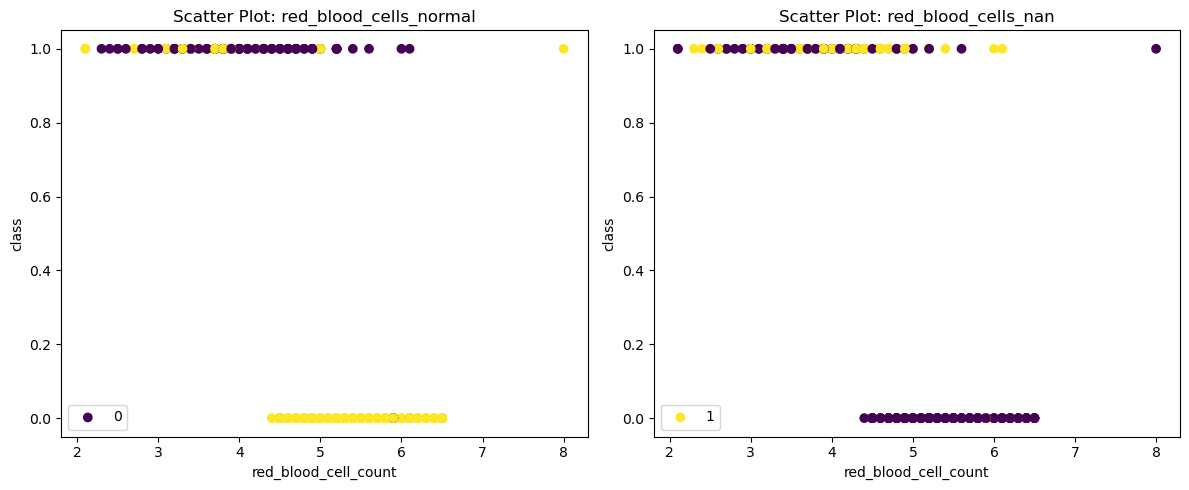

In [93]:
## correlation between rbc and rbcc
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot with red_blood_cells_normal
axes[0].scatter(df['red_blood_cell_count'], df['class'], c=df_encoded['red_blood_cells_normal'])
axes[0].set_xlabel('red_blood_cell_count')
axes[0].set_ylabel('class')
axes[0].set_title('Scatter Plot: red_blood_cells_normal')
axes[0].legend(df_encoded['red_blood_cells_normal'])

# Scatter plot with red_blood_cells_nan
axes[1].scatter(df['red_blood_cell_count'], df['class'], c=df_encoded['red_blood_cells_nan'])
axes[1].set_xlabel('red_blood_cell_count')
axes[1].set_ylabel('class')
axes[1].set_title('Scatter Plot: red_blood_cells_nan')
axes[1].legend(df_encoded['red_blood_cells_nan'])

# Adjust the layout and spacing
plt.tight_layout()

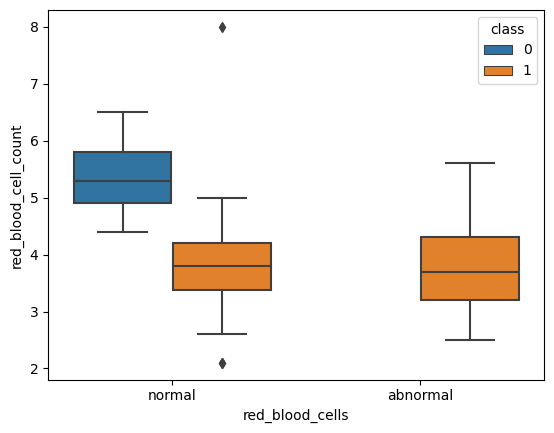

In [94]:

sb.boxplot(x='red_blood_cells', y='red_blood_cell_count', data=df, hue='class')
plt.xlabel('red_blood_cells')
plt.ylabel('red_blood_cell_count')
plt.show()


### No obvios correlation between red_blood_cells and red_blood_cell_count

One would think that red blood cells and red blood cell count have a strong correlation, but somehow, that is not the case. Therefore, both columns cannot be dropped. There is a correlation between red_blood_cells and class, whereas no obvious correlation between red_blood_cells and red_blood_cell_count. 

## Highest correlations with class

The sorted correlation matrix shows the highest correlations with the class. The first 6 columns with the highest correlations with class are visualized again as boxplots here.

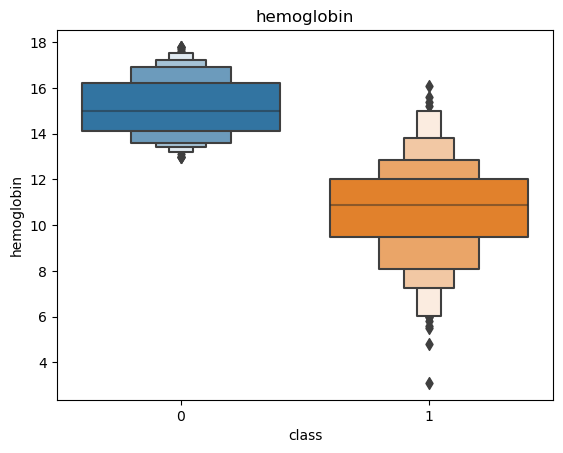

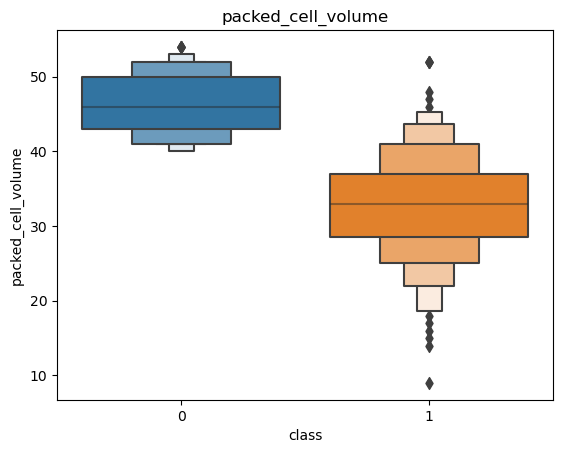

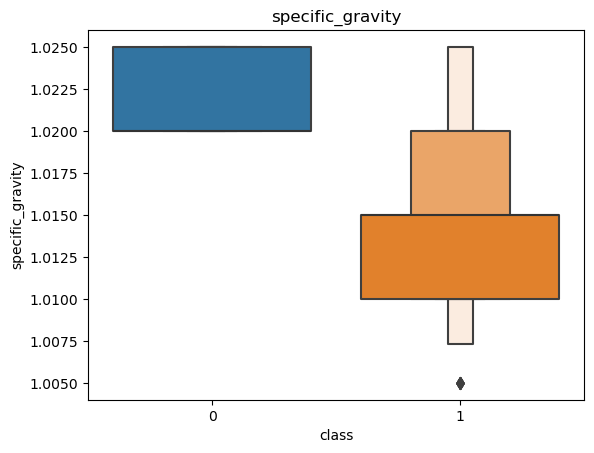

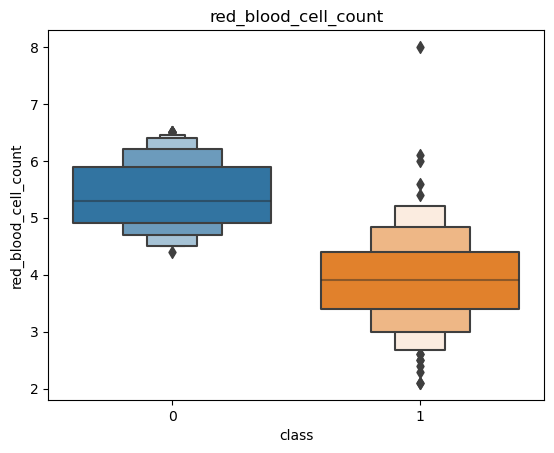

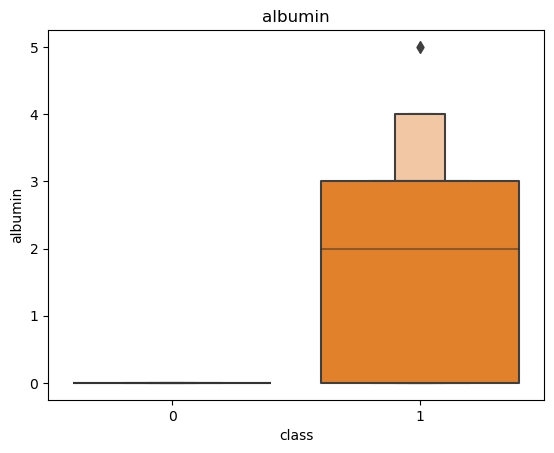

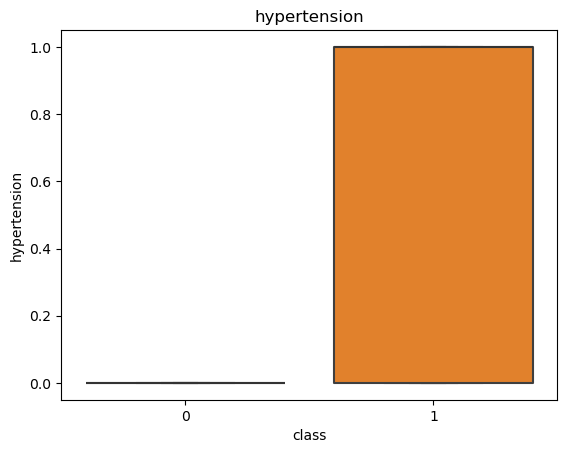

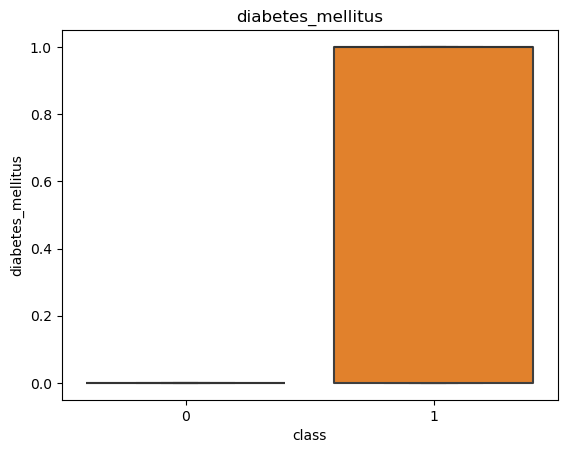

In [97]:
sorted = df_numeric.corr().sort_values(by='class', ascending=False)
for i in range(1,8):
    col = sorted_corr_matrix.index[i]
    if not 'nan' in col: 
        sb.boxenplot(x='class', y=col, data=df_numeric)
        plt.xlabel('class')
        plt.title(col)
        plt.ylabel(col)
        plt.show()

### Correlation between hypertension and class
It is commonly known that bad kidney performance leads to hypertension. Therefore it is no surprise that this variable has the highest correlation with the class variable.

### Suspected correlation between serum creatinine and class
Since creatinine is a very crucial indicator for kidney performance, we will visualize here the correlation:

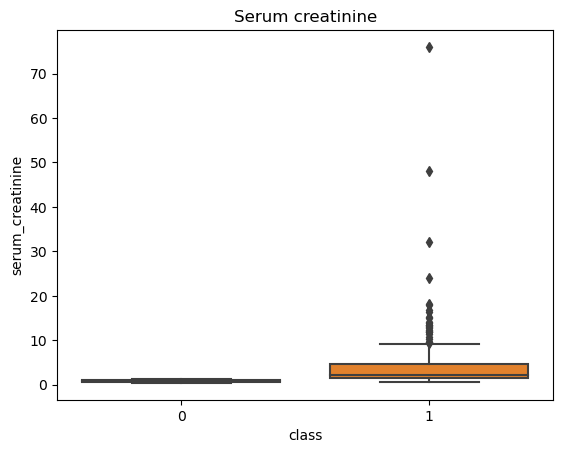

In [100]:
sb.boxplot(x='class', y='serum_creatinine', data=df)
plt.xlabel('class')
plt.ylabel('serum_creatinine')
plt.title('Serum creatinine')
plt.show()

### Correlations between creatinine and class are not as strong as suspected
The serum creatinine does not belong to the top correlations with class which were identified above and by the correlation matrix. This suggests that other factors influence the presence or absence of chronic kidney disease more strongly. As diabetes_mellitus is another disease that has effects on the measurements of patients. As diabetes mellitus is very strongly correlated with chronic kidney disease, which is also generally known, we assume that the most correlated variables with the class variable are also the ones strongly correlated with diabetes_mellitus. We need to be careful to jump to conclusions about causation and explaining chronic kidney disease in patients which also have diabetes.

### Correlation between diabetes and ckd strong. 
Let's see whether the variables with the highest correlation with class also have a high correlation with diabetes.

In [103]:
for i in range(1,18):
    col = sorted_corr_matrix.index[i]
    if not 'nan' in col: 
        print(col)

hemoglobin
packed_cell_volume
specific_gravity
red_blood_cell_count
albumin
hypertension
diabetes_mellitus
red_blood_cells
pus_cell
blood_glucose_random
appetite
blood_urea
sodium
pedal_edema
sugar
anemia
serum_creatinine
blood_pressure


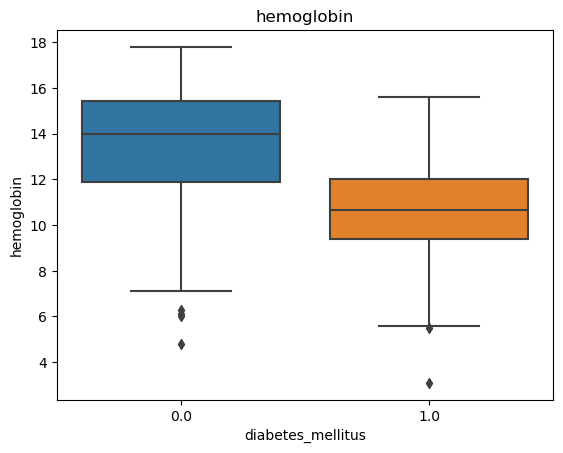

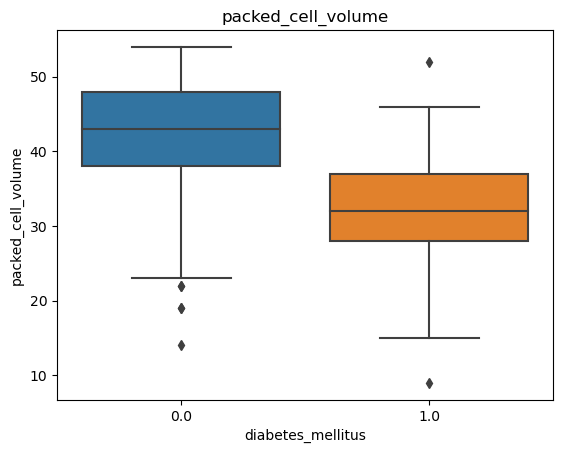

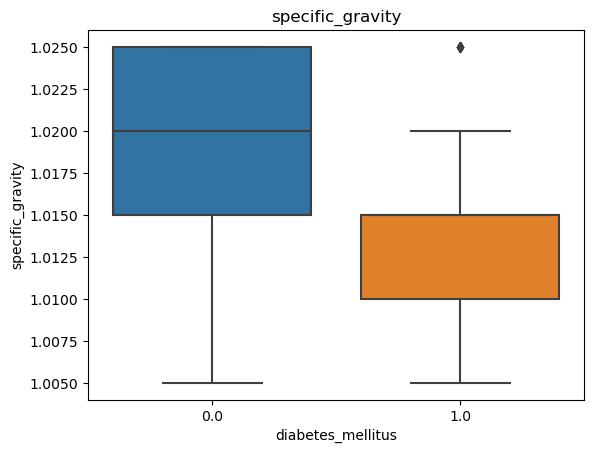

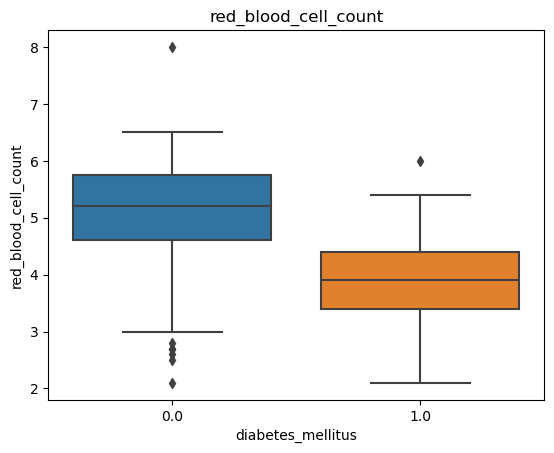

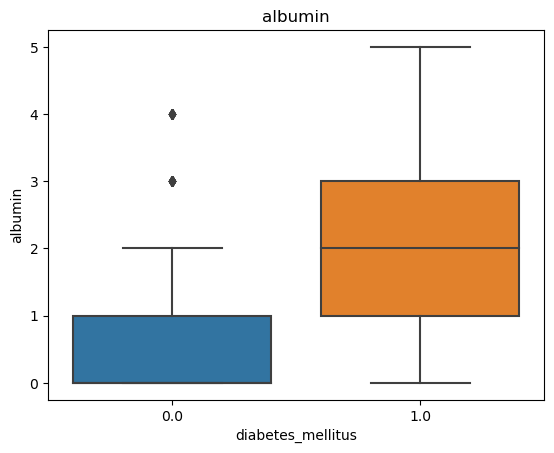

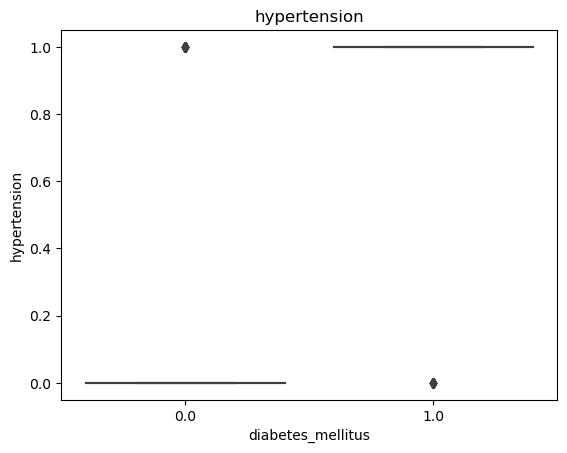

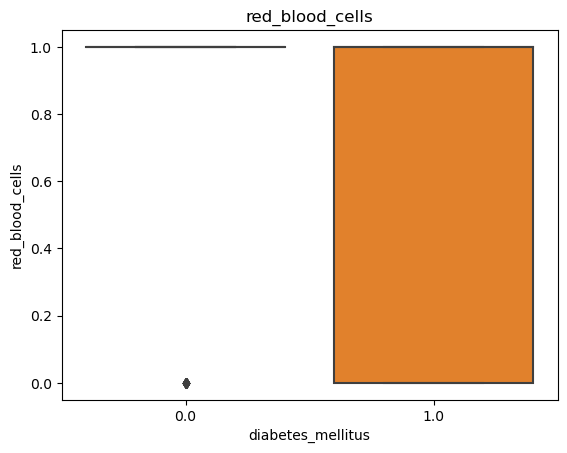

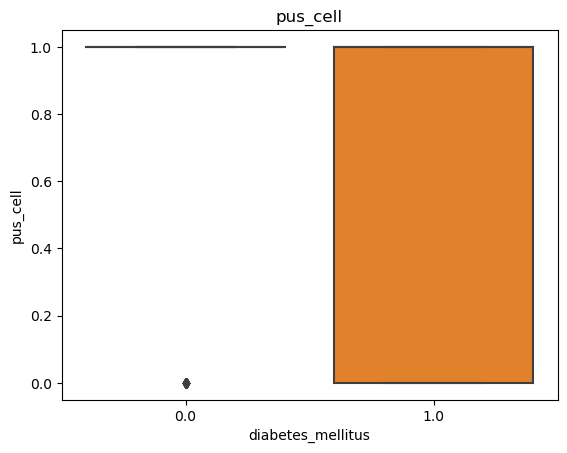

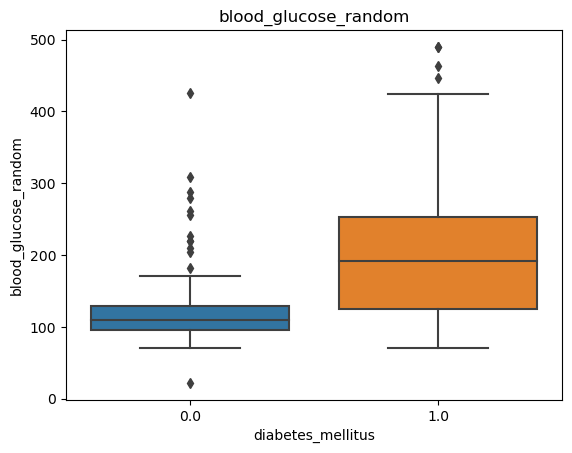

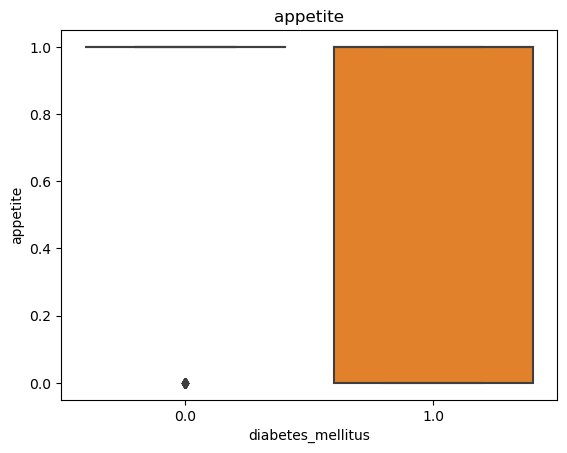

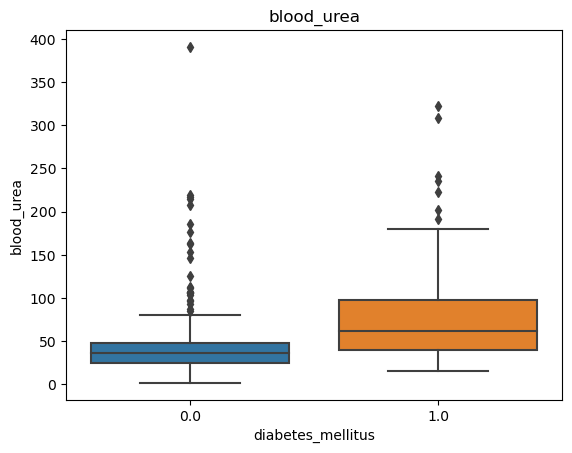

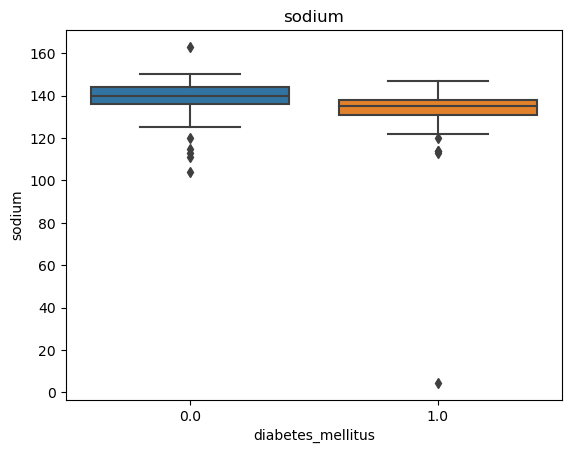

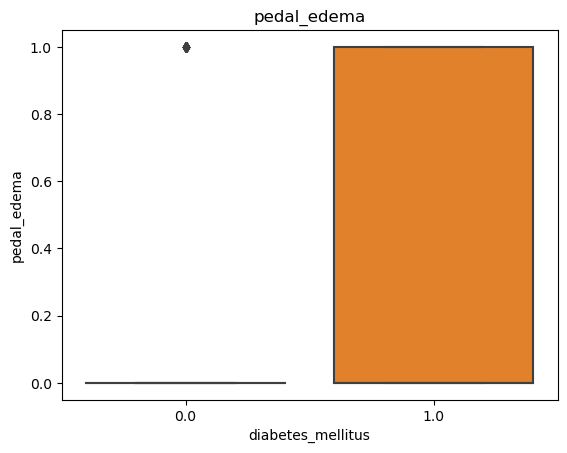

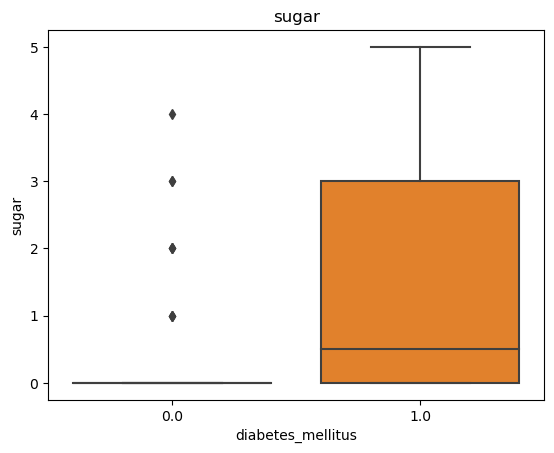

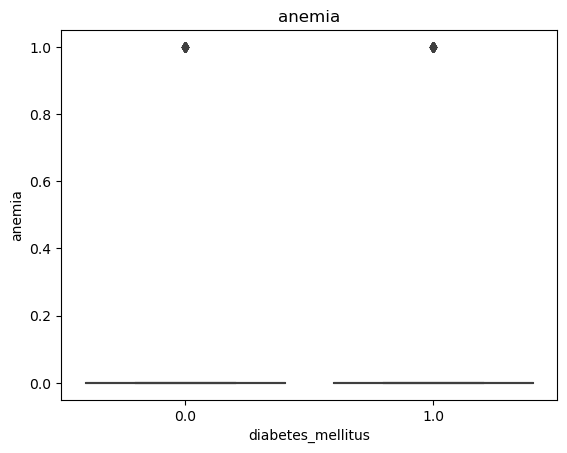

In [105]:

for i in range(1,17):
    col = sorted_corr_matrix.index[i]
    if not 'nan' in col and not 'diabetes_mellitus' in col: 

        sb.boxplot(x='diabetes_mellitus', y=col, data=df_numeric)
        plt.xlabel('diabetes_mellitus')
        plt.ylabel(col)
        plt.title(col)
        plt.show()


## Creating a dataset without the diabetes patients
Since there is such a high correlation between diabetes and chronic kidney disease, the disease can hardly be analyzed isolated. We will check whether a reduced dataset without the diabetes patients also provides valuable results.

In [168]:
# remove all columns in which diabetes_mellitus is true
df_without_diabetes = df_numeric[df_numeric['diabetes_mellitus'] == False].copy()
df_without_diabetes = df_without_diabetes.drop(columns=['diabetes_mellitus'])

In [169]:
df_without_diabetes.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  256.000000      252.000000        245.000000  245.000000  245.000000   
mean    46.890625       74.246032          1.018980    0.653061    0.077551   
std     17.612043       11.596940          0.005354    1.165611    0.441340   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     34.750000       70.000000          1.015000    0.000000    0.000000   
50%     47.000000       70.000000          1.020000    0.000000    0.000000   
75%     60.000000       80.000000          1.025000    1.000000    0.000000   
max     83.000000      120.000000          1.025000    4.000000    4.000000   

       red_blood_cells    pus_cell  pus_cell_clumps    bacteria  \
count       188.000000  237.000000       257.000000  257.000000   
mean          0.882979    0.852321         0.070039    0.042802   
std           0.322304    0.355533         0.255711    0.202804   
min           0.000000    0.000000         0.000000    0.000000   
25%           1.000000    1.000000         0.000000    0.000000   
50%           1.000000    1.000000         0.000000    0.000000   
75%           1.000000    1.000000         0.000000    0.000000   
max           1.000000    1.000000         1.000000    1.000000   

       blood_glucose_random  ...  hemoglobin  packed_cell_volume  \
count            229.000000  ...  228.000000          220.000000   
mean             117.524017  ...   13.554386           42.000000   
std               41.416113  ...    2.675954            8.088551   
min               22.000000  ...    4.800000           14.000000   
25%               95.000000  ...   11.875000           38.000000   
50%              109.000000  ...   14.000000           43.000000   
75%              129.000000  ...   15.425000           48.000000   
max              425.000000  ...   17.800000           54.000000   

       white_blood_cell_count  red_blood_cell_count  hypertension  \
count              201.000000            183.000000    261.000000   
mean              8033.333333              5.069945      0.157088   
std               2545.492749              0.929033      0.364583   
min               2200.000000              2.100000      0.000000   
25%               6300.000000              4.600000      0.000000   
50%               7800.000000              5.200000      0.000000   
75%               9500.000000              5.750000      0.000000   
max              19100.000000              8.000000      1.000000   

       coronary_artery_disease    appetite  pedal_edema      anemia  \
count               261.000000  260.000000   260.000000  260.000000   
mean                  0.030651    0.888462     0.103846    0.103846   
std                   0.172702    0.315405     0.305649    0.305649   
min                   0.000000    0.000000     0.000000    0.000000   
25%                   0.000000    1.000000     0.000000    0.000000   
50%                   0.000000    1.000000     0.000000    0.000000   
75%                   0.000000    1.000000     0.000000    0.000000   
max                   1.000000    1.000000     1.000000    1.000000   

            class  
count  261.000000  
mean     0.432950  
std      0.496436  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  

[8 rows x 24 columns]

In [193]:
without_diab_corr = df_without_diabetes.corr().abs()
compare = pd.DataFrame(without_diab_corr.sort_values('class', ascending=False)['class'])
compare['with_diab_col'] = sorted_corr_matrix['class'].index.drop('diabetes_mellitus')
compare['with_diab_corr'] = sorted_corr_matrix['class'].drop('diabetes_mellitus').to_list()
compare

class            with_diab_col  with_diab_corr
class                    1.000000                    class        1.000000
hemoglobin               0.781785               hemoglobin        0.768919
specific_gravity         0.752987       packed_cell_volume        0.741427
packed_cell_volume       0.736751         specific_gravity        0.732163
albumin                  0.664747     red_blood_cell_count        0.699089
red_blood_cell_count     0.617659                  albumin        0.627090
red_blood_cells          0.613150             hypertension        0.588820
pus_cell                 0.495739          red_blood_cells        0.555097
hypertension             0.494052                 pus_cell        0.461812
sodium                   0.431270     blood_glucose_random        0.419672
appetite                 0.404122                 appetite        0.392645
anemia                   0.388261               blood_urea        0.380605
pedal_edema              0.388261                   sodium        0.375674
blood_urea               0.359512              pedal_edema        0.374480
serum_creatinine         0.354118                    sugar        0.344070
pus_cell_clumps          0.309799                   anemia        0.324787
blood_glucose_random     0.296610         serum_creatinine        0.299969
blood_pressure           0.284702           blood_pressure        0.294077
bacteria                 0.238710          pus_cell_clumps        0.263226
white_blood_cell_count   0.211949  coronary_artery_disease        0.235153
sugar                    0.208483   white_blood_cell_count        0.231919
coronary_artery_disease  0.203506                      age        0.227268
potassium                0.081072                 bacteria        0.185345
age                      0.031875                potassium        0.084541

### Results

luckily, the correlations do not change drastically. However, we will still save this dataset and perform our trainings on both.

In [194]:
# save to csv
df_without_diabetes.to_csv('processed/df_without_diabetes.csv', index=False)

## Obvious correlations among other variables

In [63]:
flattened_corr = df_numeric.corr().unstack().abs().sort_values(ascending=False)

# Remove self-correlations (where both variables are the same)
flattened_corr = flattened_corr[flattened_corr.index.get_level_values(0) != flattened_corr.index.get_level_values(1)]

# Get the top 10 correlation values and their corresponding column names
top_corr = flattened_corr.head(20)
top_col = top_corr.index.tolist()
relevant_correlations = []
# Print the top 10 correlation values and their corresponding column names
for i, corr_value in enumerate(top_corr):
    col1, col2 = top_col[i]
    if((col2, col1) not in relevant_correlations and 'class' not in col1 and 'class' not in col2):
        relevant_correlations.append((col1, col2))
        print("Correlation: {:.3f} - Columns: {}, {}".format(corr_value, col1, col2))

Correlation: 0.895 - Columns: packed_cell_volume, hemoglobin
Correlation: 0.799 - Columns: hemoglobin, red_blood_cell_count
Correlation: 0.792 - Columns: packed_cell_volume, red_blood_cell_count
Correlation: 0.718 - Columns: blood_glucose_random, sugar
Correlation: 0.690 - Columns: serum_creatinine, sodium
Correlation: 0.648 - Columns: hypertension, red_blood_cell_count


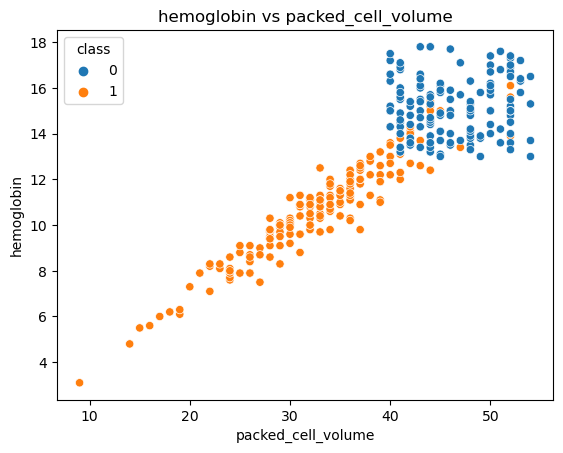

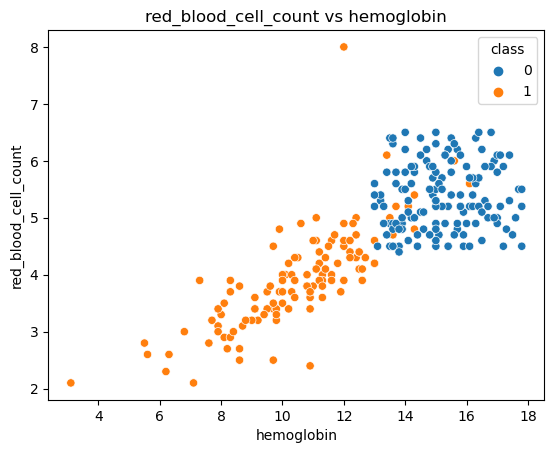

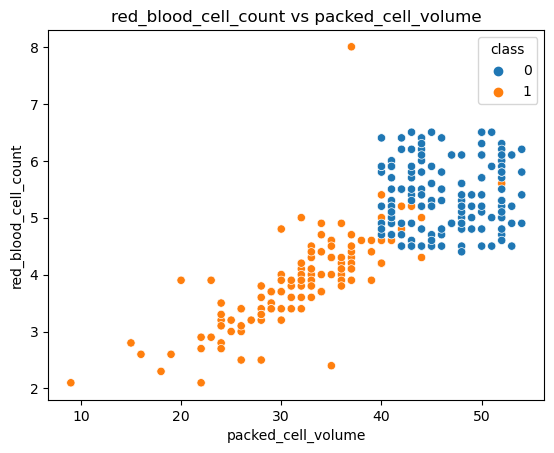

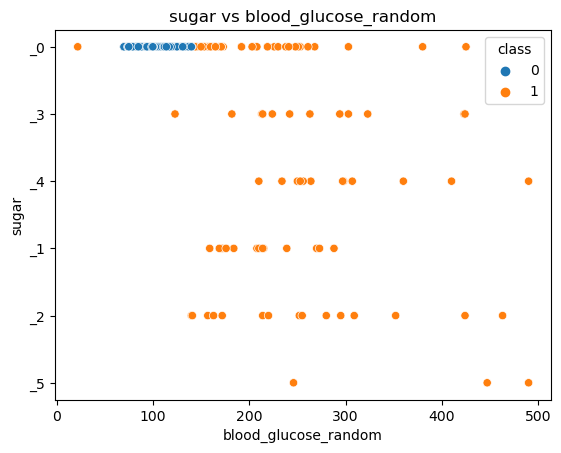

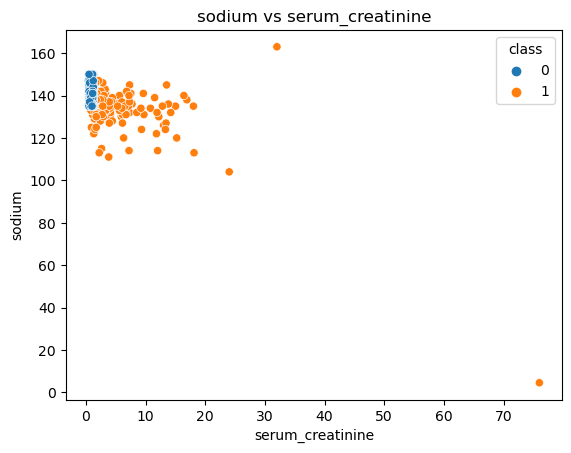

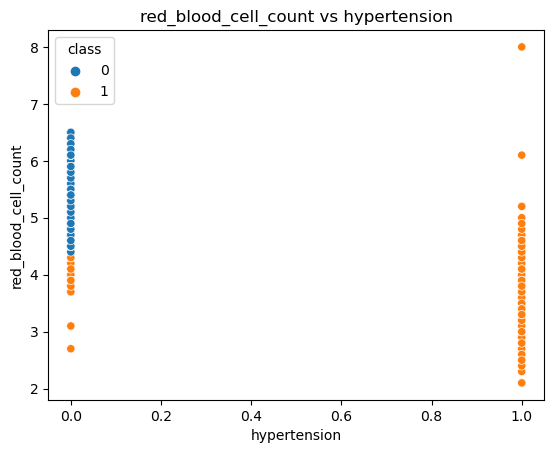

In [65]:
for col1, col2 in relevant_correlations:
    sb.scatterplot(x=col1, y=col2, data=df, hue='class')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'{col2} vs {col1}')
    plt.show()

## Analysis of missing values and correlations

In [45]:
nan_counts = df.isna().sum().sort_values(ascending = False)
nan_counts

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

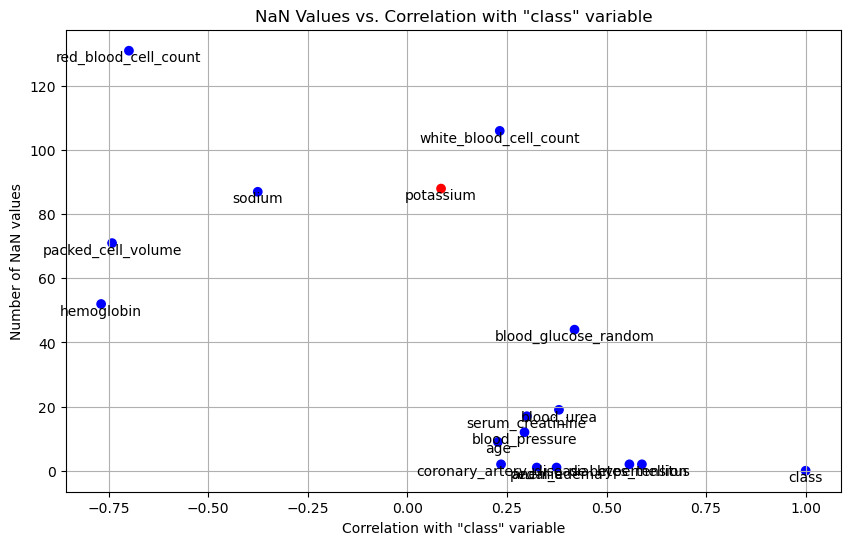

In [46]:

# Retrieve correlation values with the 'class' variable
correlation_values = corr_matrix['class']

# Merge correlation values and NaN counts into a single DataFrame
correl_nan = pd.concat([correlation_values, nan_counts], axis=1, keys=['Correlation', 'NaN_Count'])

colors = np.where(np.abs(correl_nan['Correlation']) < 0.1, 'red', 'blue')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(correl_nan['Correlation'], correl_nan['NaN_Count'],  c=colors)
plt.xlabel('Correlation with "class" variable')
plt.ylabel('Number of NaN values')
plt.title('NaN Values vs. Correlation with "class" variable')

for i, row in correl_nan.iterrows():
    plt.text(row['Correlation'], row['NaN_Count'], i, ha='center', va='top')


plt.grid(True)
plt.show()

#### Results

The potassium column could be dropped since its correlation with the class is very low (below 0.1). But there are other columns which have much more nan values and have a negative correlation with the class variables. We choose to impute the values instead of dropping any columns.